In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv("train-metadata.csv")

/var/folders/j9/mn396xrj16x1m5n402tww2nw0000gn/T/ipykernel_42070/3632641718.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train-metadata.csv")


In [3]:
df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [4]:
df.shape

(401059, 55)

# Examine target (benign/malignant)

In [14]:
df[df['target'] == 1].head(1)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
387,ISIC_0082829,1,IP_3249371,80.0,female,anterior torso,9.27,TBP tile: close-up,3D: XP,18.093368,...,IL_7881385,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,NaN,NaN,NaN,NaN,72.211683


In [21]:
# Ratio of positive cases out of total cases
df[df['target'] == 1].shape[0]/df.shape[0] * 100

0.09799056996601498

### Only about 0.01% of total cases are positive. We have a huge class imbalance that needs to be accounted for!

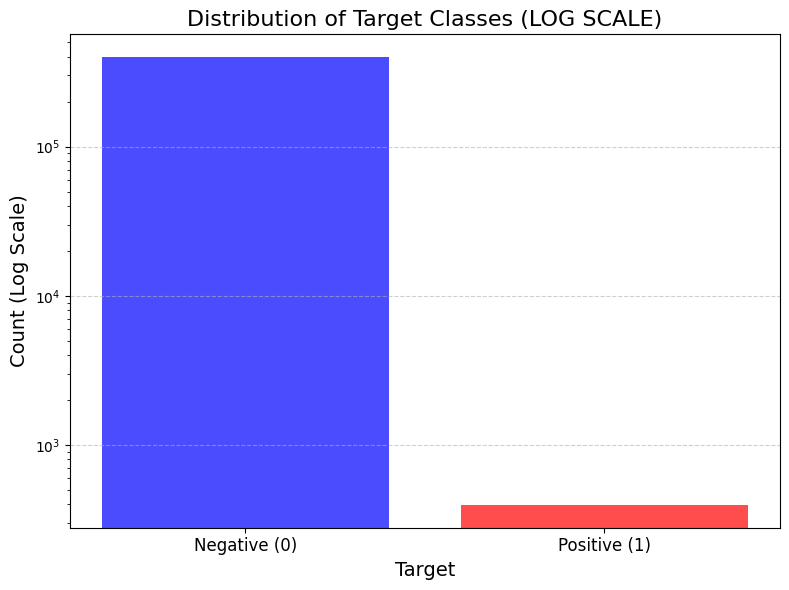

In [25]:
# Count the occurrences of each target class
target_counts = df['target'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'], alpha=0.7)
plt.title('Distribution of Target Classes (LOG SCALE)', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)
plt.xticks(target_counts.index, ['Negative (0)', 'Positive (1)'], fontsize=12)
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

# Examine features most correlated with target

In [27]:
# Select numeric columns
numeric_features = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Get the correlation of all features with the target
correlation_with_target = correlation_matrix['target']

# Sort correlations by absolute value (highest to lowest)
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Display the most correlated features
print("Most correlated features with target:")
print(sorted_correlation[1:21])  # Exclude 'target' itself

Most correlated features with target:
tbp_lv_dnn_lesion_confidence    0.054766
tbp_lv_areaMM2                  0.045139
tbp_lv_H                        0.044884
tbp_lv_perimeterMM              0.036188
tbp_lv_minorAxisMM              0.035757
tbp_lv_deltaB                   0.035069
clin_size_long_diam_mm          0.032682
tbp_lv_Hext                     0.032671
tbp_lv_B                        0.026366
tbp_lv_stdLExt                  0.026084
tbp_lv_radial_color_std_max     0.025441
tbp_lv_color_std_mean           0.024271
tbp_lv_Aext                     0.023206
tbp_lv_norm_color               0.022264
tbp_lv_A                        0.019788
tbp_lv_deltaLBnorm              0.015172
tbp_lv_Bext                     0.013711
tbp_lv_nevi_confidence          0.013341
tbp_lv_stdL                     0.012669
tbp_lv_deltaLB                  0.012237
Name: target, dtype: float64


# Patterns for positive cases

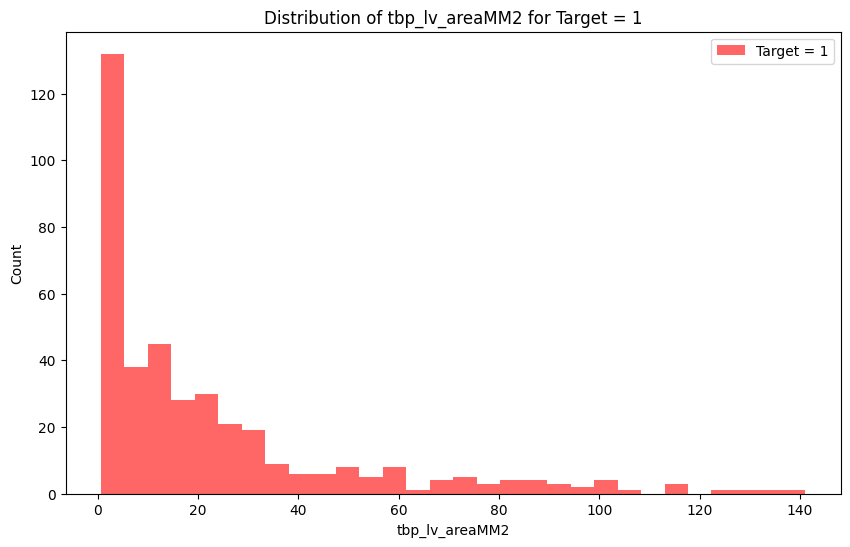

In [34]:
feature = 'tbp_lv_areaMM2'

plt.figure(figsize=(10, 6))

# Plot the distribution for target = 1
plt.hist(df[df['target'] == 1][feature], bins=30, alpha=0.6, label='Target = 1', color='red')

# Plot the distribution for target = 0
# plt.hist(df[df['target'] == 0][feature], bins=30, alpha=0.6, label='Target = 0', color='blue')

# Add labels and title
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Distribution of {feature} for Target = 1')
plt.legend()
plt.show()

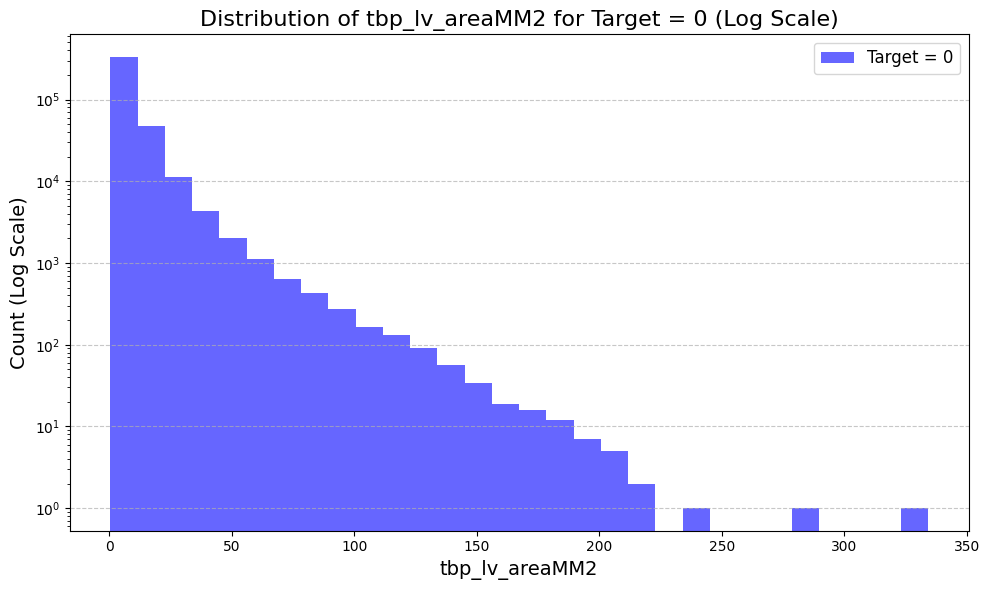

In [32]:
feature = 'tbp_lv_areaMM2'

plt.figure(figsize=(10, 6))

# Plot the distribution for target = 0
plt.hist(
    df[df['target'] == 0][feature].dropna(), 
    bins=30, 
    alpha=0.6, 
    label='Target = 0', 
    color='blue'
)

# Add labels and title
plt.xlabel(feature, fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)
plt.title(f'Distribution of {feature} for Target = 0 (Log Scale)', fontsize=16)
plt.yscale('log')  # Set the y-axis to log scale
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### We see that lesions are larger generally for people with malignant cases

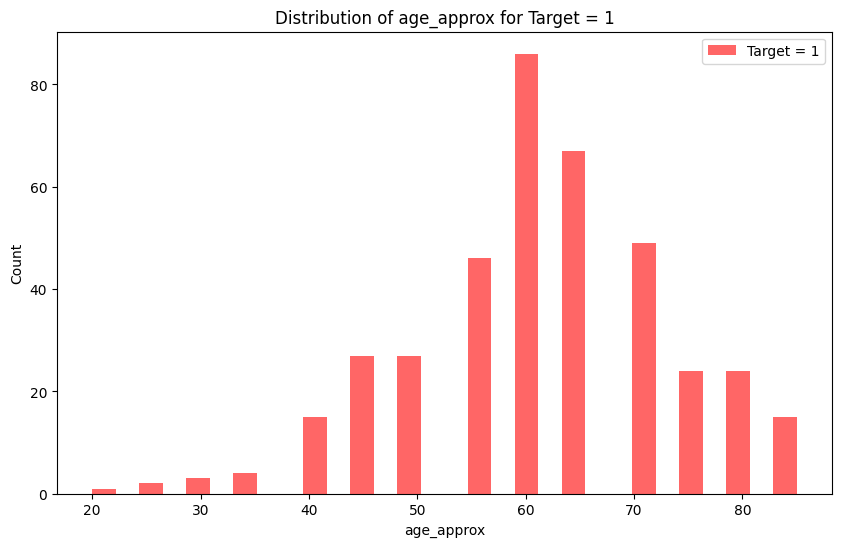

In [23]:
feature = 'age_approx'

plt.figure(figsize=(10, 6))

# Plot the distribution for target = 1
plt.hist(df[df['target'] == 1][feature], bins=30, alpha=0.6, label='Target = 1', color='red')

# Plot the distribution for target = 0
# plt.hist(df[df['target'] == 0][feature], bins=30, alpha=0.6, label='Target = 0', color='blue')

# Add labels and title
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Distribution of {feature} for Target = 1')
plt.legend()
plt.show()

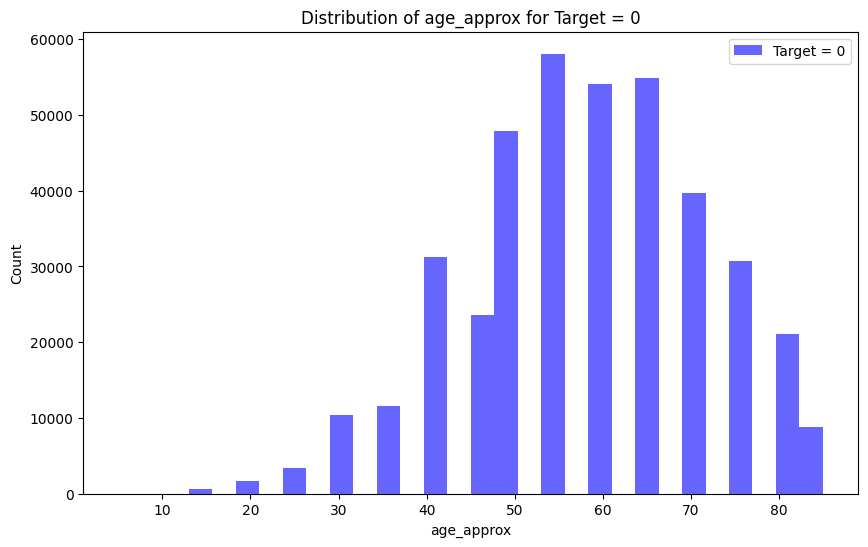

In [37]:
feature = 'age_approx'

plt.figure(figsize=(10, 6))

# Plot the distribution for target = 0
plt.hist(df[df['target'] == 0][feature], bins=30, alpha=0.6, label='Target = 0', color='blue')

# Plot the distribution for target = 0
# plt.hist(df[df['target'] == 0][feature], bins=30, alpha=0.6, label='Target = 0', color='blue')

# Add labels and title
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Distribution of {feature} for Target = 0')
plt.legend()
plt.show()